# EDA Signal Analysis

### Import packages

In [5]:
import neurokit2 as nk
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib tk


### Specify data path and initialize variables

In [2]:
sampling_rate = 250.0
data_path = r'sample_data/'
signal_path = os.path.join(data_path, 'P1_S1_baseline_1674758272_855629.csv')


### Load the data and plot signal

In [3]:
eda = []
arduino_ts = []
event_code = []
skip_first = True
with open(signal_path, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for ln in csvreader:
        if skip_first:
            print(ln)
            skip_first = False
        else:
            # print(ln)
            # break
            eda.append(float(ln[0]))
            arduino_ts.append(float(ln[4]))
            if ln[5] != '':
                event_code.append(float(ln[5]))
            else:
                event_code.append(-1)

eda = np.array(eda)
arduino_ts = np.array(arduino_ts)
arduino_ts = (arduino_ts - arduino_ts[0])/1000
event_code = np.array(event_code)
# plt.plot(np.arange(0, len(raw_signal)/sampling_rate, 1/sampling_rate), raw_signal)

['EDA', 'Resp', 'PPG Finger', 'PPG Ear', 'arduino_ts', 'event_code']


Text(0, 0.5, 'Signal Amplitude')

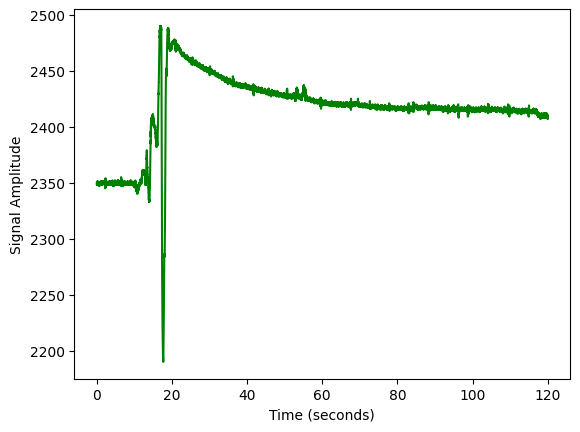

In [4]:
plt.plot(arduino_ts, eda, 'g')
plt.plot(arduino_ts[event_code != -1], eda[event_code != -1], 'ro', markersize=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")


In [7]:
start_time = 30
end_time = 120
sts = int(start_time * sampling_rate)
ends = int(end_time * sampling_rate)
eda = eda[sts:ends]
arduino_ts = arduino_ts[sts:ends]
event_code = event_code[sts:ends]

plt.plot(arduino_ts, eda, 'g')
plt.plot(arduino_ts[event_code != -1], eda[event_code != -1], 'ro', markersize=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")

Text(0, 0.5, 'Signal Amplitude')

***
### Process EDA Signal
***

In [10]:
signals, info = nk.eda_process(eda, sampling_rate=sampling_rate)
# Extract clean EDA and SCR features
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

In [11]:
# Plot EDA signal
nk.eda_plot(signals)